In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# For reproducibility
np.random.seed(42)

In [34]:
df = pd.read_csv('data/WineQT.csv')

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [35]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [36]:
print("\nStatistics Summary:")
df.describe()


Statistics Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


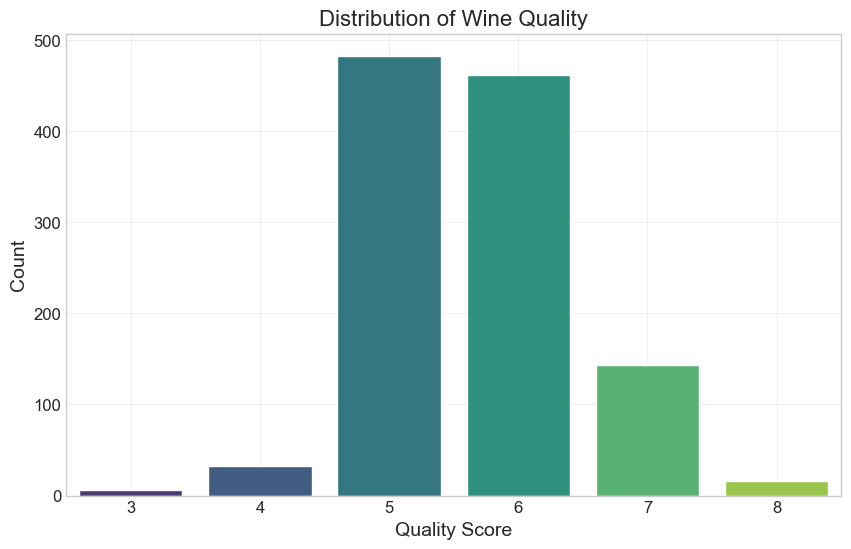

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [38]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [39]:
quality_counts = df['quality'].value_counts().sort_index()
quality_percentage = df['quality'].value_counts(normalize=True).sort_index() * 100

print("\nQuality Counts:")
for quality, count in quality_counts.items():
    print(f"Quality {quality}: {count} wines ({quality_percentage[quality]:.2f}%)")


Quality Counts:
Quality 3: 6 wines (0.52%)
Quality 4: 33 wines (2.89%)
Quality 5: 483 wines (42.26%)
Quality 6: 462 wines (40.42%)
Quality 7: 143 wines (12.51%)
Quality 8: 16 wines (1.40%)


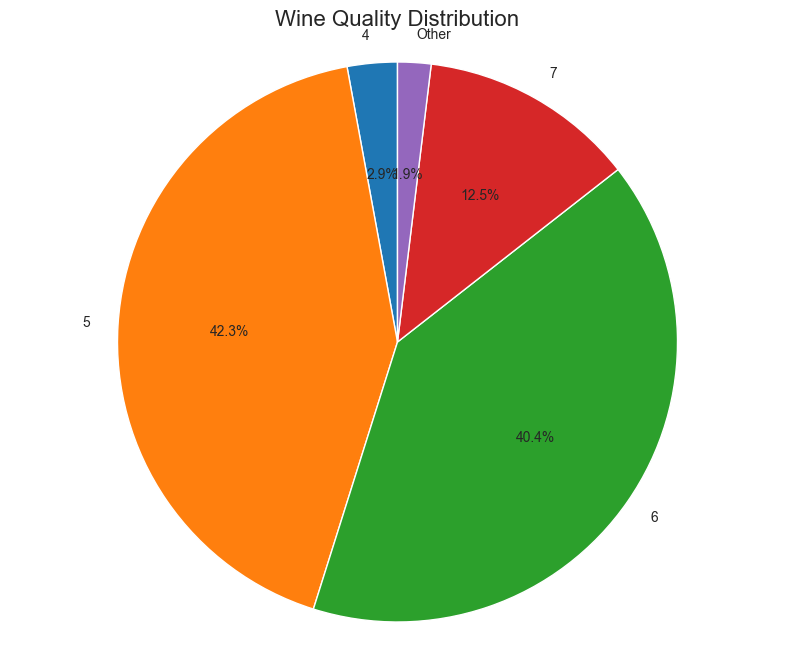

In [40]:
quality_counts = df['quality'].value_counts().sort_index()
quality_percentage = df['quality'].value_counts(normalize=True).sort_index() * 100

# Combine categories with <2% into 'Other'
threshold = 2.0
large_labels = quality_percentage[quality_percentage >= threshold].index
small_labels = quality_percentage[quality_percentage < threshold].index


combined_counts = quality_counts[large_labels].copy()
combined_counts['Other'] = quality_counts[small_labels].sum()


combined_percentages = combined_counts / combined_counts.sum() * 100


plt.figure(figsize=(10, 8))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Wine Quality Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [41]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.shape

(1143, 13)

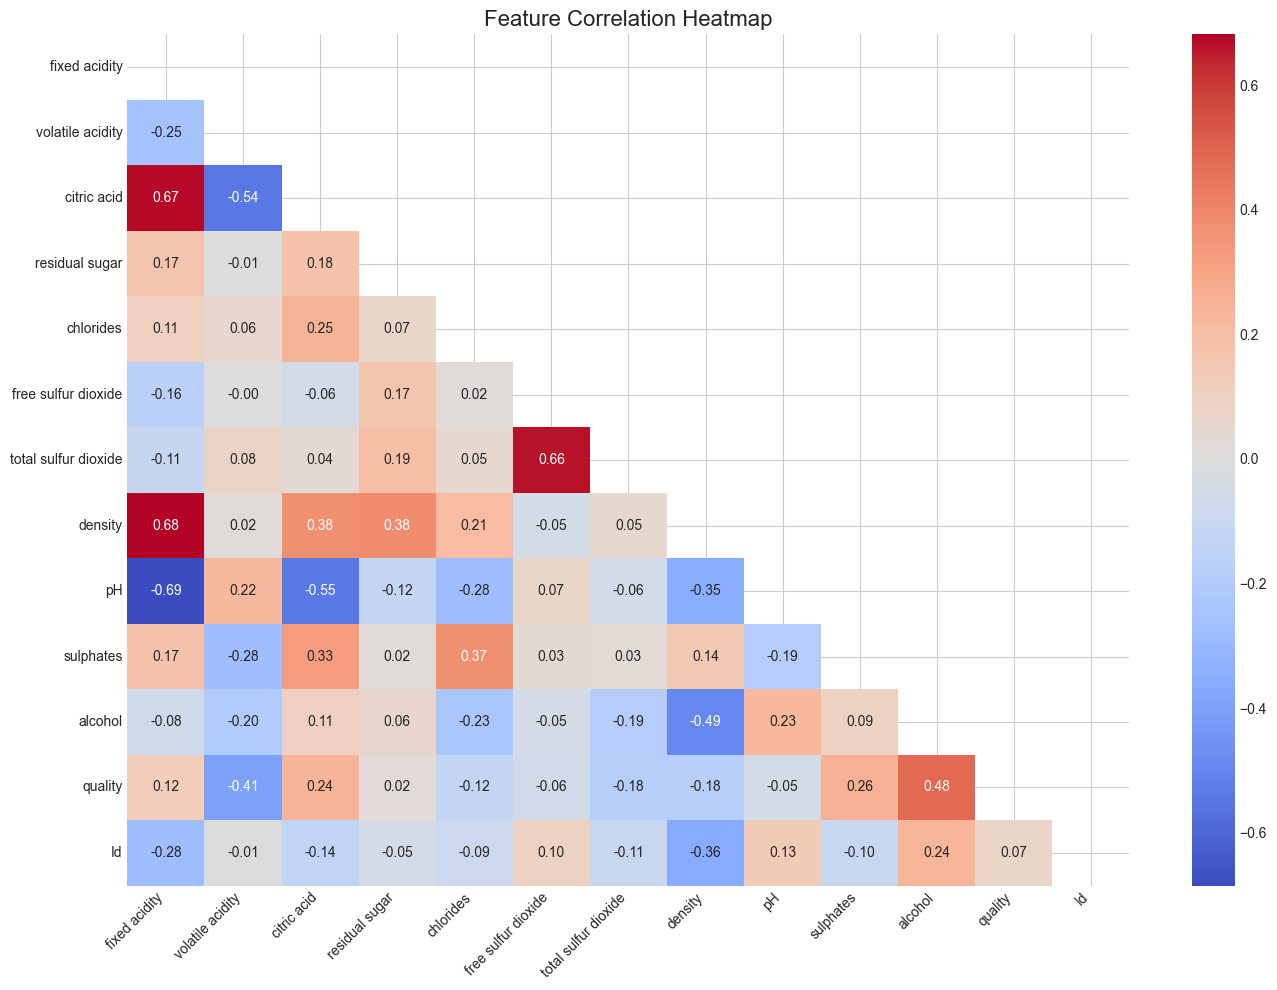

In [44]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [45]:
quality_counts = df['quality'].value_counts().sort_index()
print("Original quality distribution:")
print(quality_counts)

Original quality distribution:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


In [46]:
df['quality_binary'] = (df['quality'] >= 6).astype(int)

In [47]:
print("\nBinary Quality Distribution:")
print(df['quality_binary'].value_counts())
print(f"Good wines (1): {df['quality_binary'].sum()}")
print(f"Bad wines (0): {len(df) - df['quality_binary'].sum()}")


Binary Quality Distribution:
quality_binary
1    621
0    522
Name: count, dtype: int64
Good wines (1): 621
Bad wines (0): 522


In [48]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    print(f"Shape before outlier removal: {df.shape}")
    print(f"Shape after outlier removal: {df_clean.shape}")
    return df_clean

In [49]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['quality', 'quality_binary']]
df_clean = remove_outliers(df, numeric_cols)

Shape before outlier removal: (1143, 14)
Shape after outlier removal: (797, 14)


In [50]:
df_clean = df_clean.drop('Id', axis=1)

In [51]:
df_clean['alcohol_to_acidity_ratio'] = df_clean['alcohol'] / (df_clean['fixed acidity'] + df_clean['volatile acidity'] + 0.01)
df_clean['sugar_to_acidity_ratio'] = df_clean['residual sugar'] / (df_clean['fixed acidity'] + df_clean['volatile acidity'] + 0.01)
df_clean['total_acidity'] = df_clean['fixed acidity'] + df_clean['volatile acidity']
df_clean['total_SO2'] = df_clean['free sulfur dioxide'] + df_clean['total sulfur dioxide']


In [52]:
X_clean = df_clean.drop(['quality', 'quality_binary'], axis=1)
y_clean = df_clean['quality_binary']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

In [54]:
X_train.columns, X_test.columns

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'alcohol_to_acidity_ratio',
        'sugar_to_acidity_ratio', 'total_acidity', 'total_SO2'],
       dtype='object'),
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'alcohol_to_acidity_ratio',
        'sugar_to_acidity_ratio', 'total_acidity', 'total_SO2'],
       dtype='object'))

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [57]:
print("Cross-validation scores:")
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation scores:
Random Forest: 0.7739 ± 0.0181
Gradient Boosting: 0.7347 ± 0.0218
Logistic Regression: 0.7269 ± 0.0405


In [58]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"\nBest parameters found: {best_params}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.7739


In [ ]:

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTuned Model Accuracy: {accuracy:.4f}")


Tuned Model Accuracy: 0.7625


In [60]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        73
           1       0.78      0.79      0.78        87

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



In [63]:
import joblib

MODEL_DIR = Path("models/")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

MODEL_PATH = MODEL_DIR / "wine_predictor.joblib"


print(f"Saving model to: {MODEL_PATH}")
joblib.dump(best_model, MODEL_PATH)
print("Model saved successfully.")

Saving model to: models\wine_predictor.joblib
Model saved successfully.


In [64]:
best_model.predict([[7.4, 0.7, 0.0, 1.9, 0.076,  11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 1.16, 0.23, 8.1, 45 ]])

array([1])